In [ ]:
# n_estimater=10
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.datasets import load_breast_cancer
import graphviz
import matplotlib.pyplot as plt
import numpy as np
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
x, y = cancer.data, cancer.target

In [ ]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
train_X, test_X, train_Y, test_Y= train_test_split(x, y)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [ ]:
# ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

In [ ]:
# 識別モデルの構築
random_forest = RandomForestClassifier(n_estimators=10, max_depth=2)
random_forest.fit(train_X, train_Y)

# 予測値算出
y_pred = random_forest.predict(test_X)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_X, train_Y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_Y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.960093896713615
Accuracy: 0.951048951048951


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        60
           1       0.95      0.96      0.96        83

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Text(91.68, 0.5, 'true value')

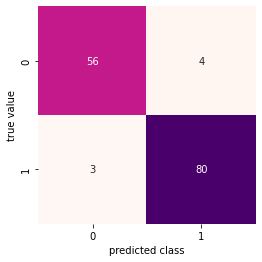

In [ ]:
#confusion matrix
mat = confusion_matrix(test_Y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [ ]:
# 変数の重要度を可視化
importance = pd.DataFrame({ 'feature' :cancer.feature_names, 'importance' :random_forest.feature_importances_})
importance

,feature,importance
0,mean radius,0.078501
1,mean texture,0.000000
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.055793
6,mean concavity,0.060668
7,mean concave points,0.182580
8,mean symmetry,0.000000
9,mean fractal dimension,0.000000


In [ ]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
  n_features = len(df)                              # 特徴量数(説明変数の個数) 
  df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
  f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
  plt.barh(range(n_features), f_importance_plot, align='center') 
  cols_plot = df_plot['feature'].values             # 特徴量の取得 
  plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
  plt.xlabel('Feature importance')                  # x軸のタイトル
  plt.ylabel('Feature')                             # y軸のタイトル

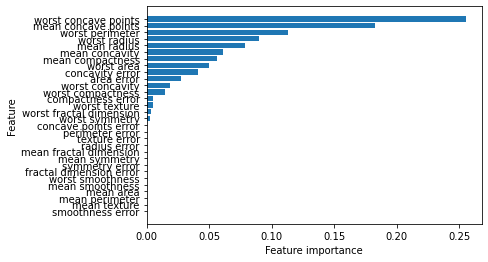

In [ ]:
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
# 特徴量重要度の可視化
plot_feature_importance(importance)

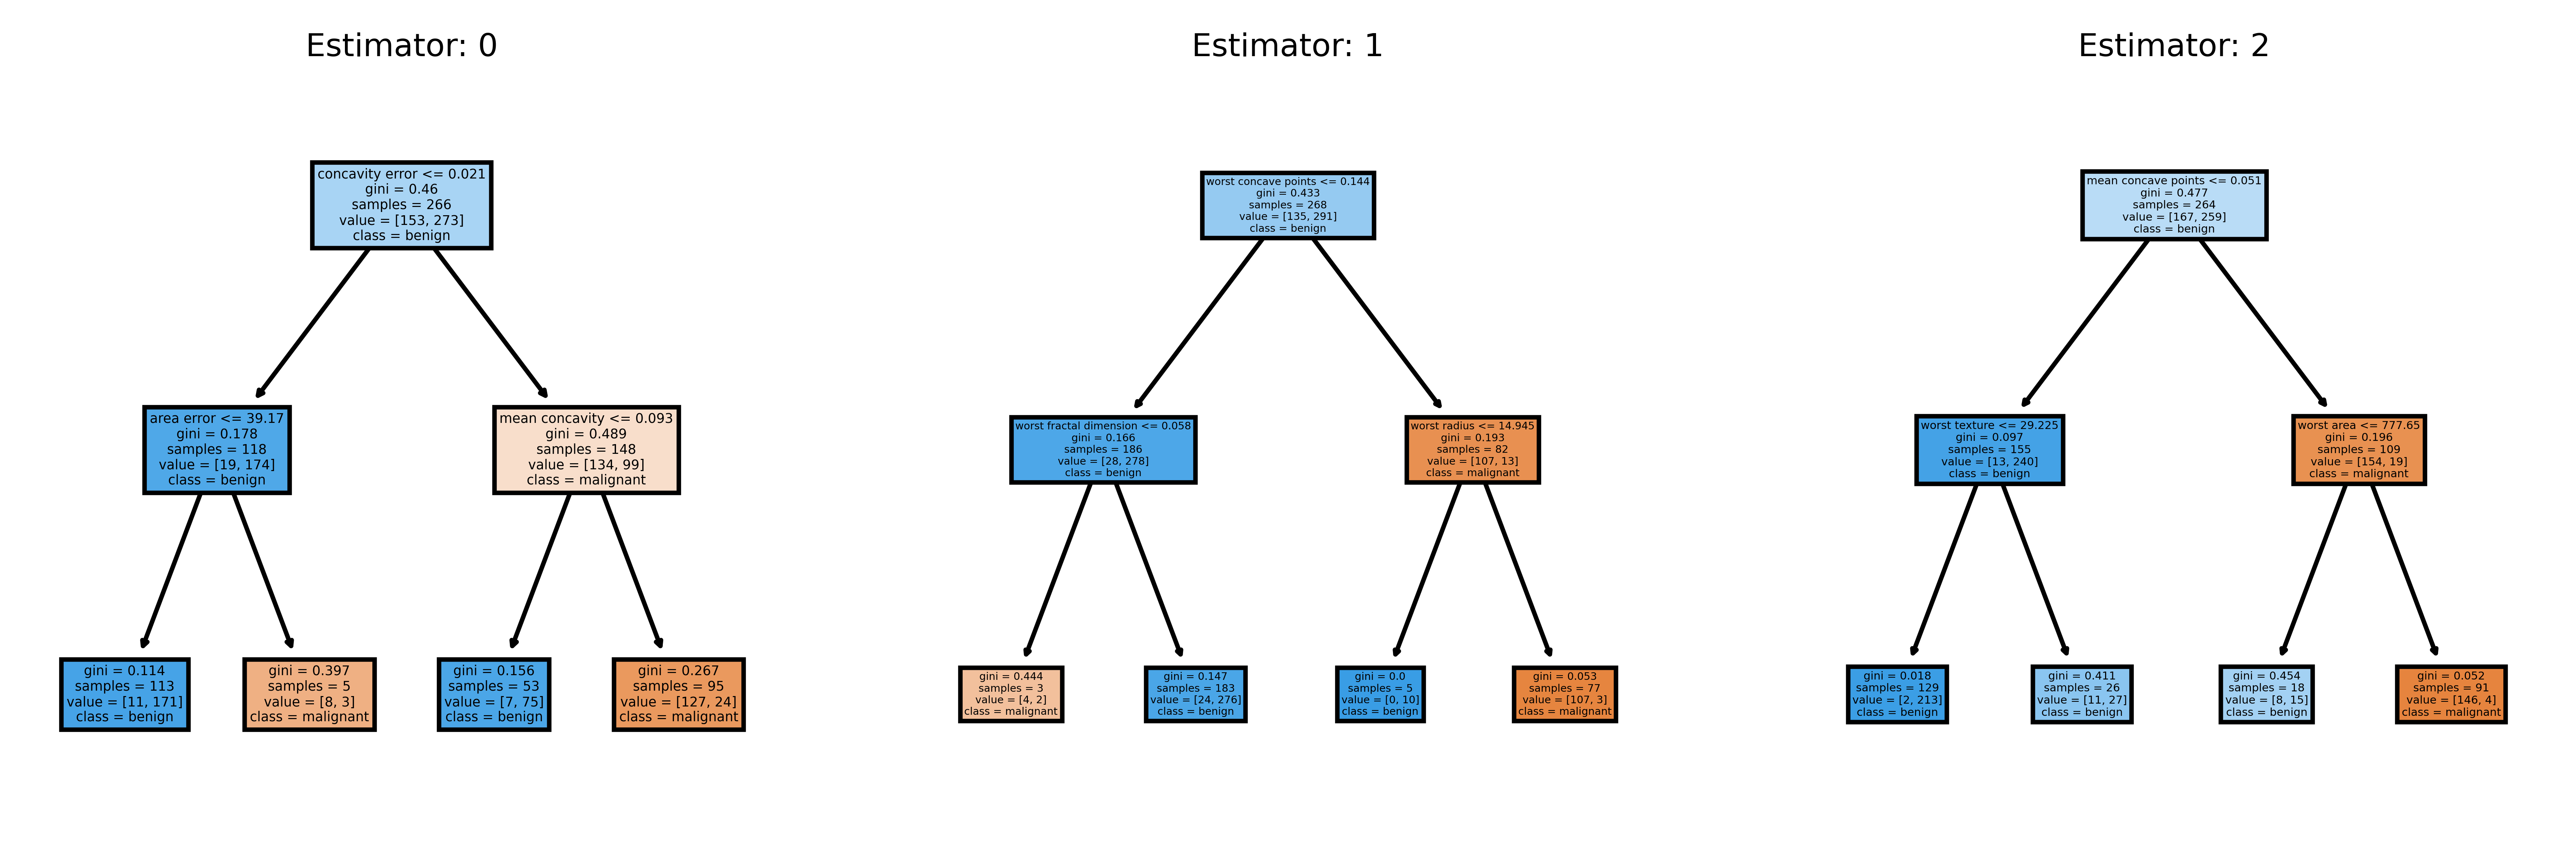

In [ ]:
import matplotlib.pyplot as plt

from sklearn import tree
import pandas as pd

classes = cancer.target_names
# This may not the best way to view each estimator as it is small

fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,3), dpi=900)
for index in range(3):
    tree.plot_tree(random_forest[index],
                   feature_names = cancer.feature_names, 
                   class_names=classes,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 7)
fig.savefig('rf_5trees.png')

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(random_forest[0],
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                )
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')


True

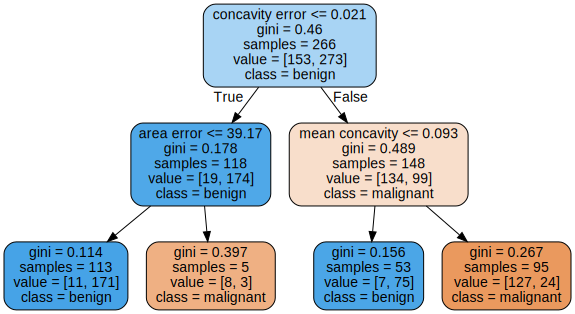

In [ ]:
graph = graphviz.Source(dot_data)
graph